<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/DBSCAN_make_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Generar datos: 
Generar datos make_blobs (tres blobs con varianzas diferentes, simulando clusters con mayor y menor densidad)
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# Generate data:
n_samples = 1500
n_clusters = 3

centers = [(0,0),(-1,1),(2,2)]
X,y = make_blobs(n_samples=n_samples,centers=centers, cluster_std=[0.1,1,0.5])

# 2. Aplicar DBSCAN para agrupar los datos en tres clústeres:
https://scikit-learn.org/stable/modules/clustering.html#dbscan



Tomamos como referencia k-means, agglomerative y GMM

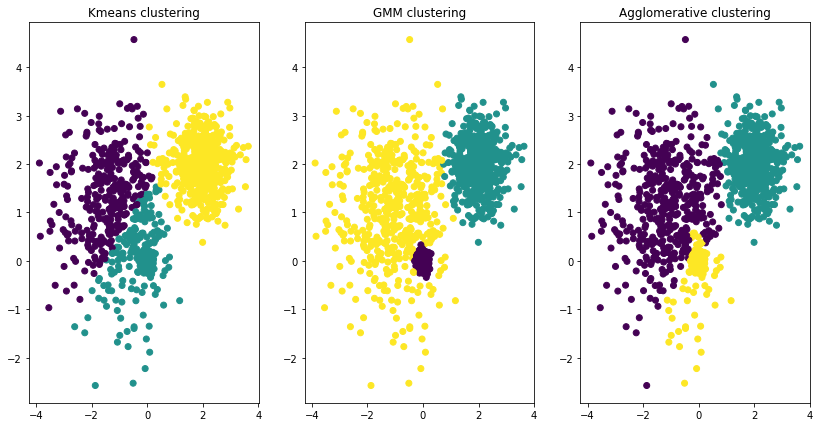

In [12]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn import mixture

# Kmeans clustering:
clust_kmeans = KMeans(n_clusters=n_clusters).fit_predict(X)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X) 

# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=n_clusters,covariance_type='full').fit_predict(X)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

In [40]:
from sklearn.cluster import DBSCAN

labels_db = DBSCAN(eps=0.03, min_samples=10).fit_predict(X)
np.unique(labels_db)

array([-1,  0,  1,  2,  3])

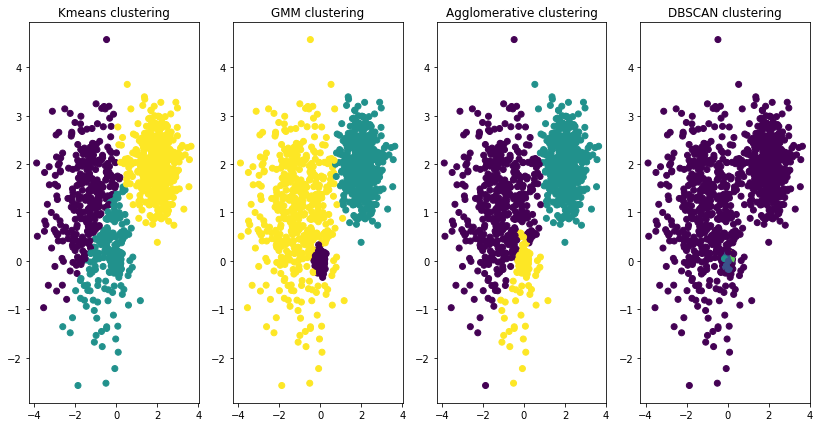

In [41]:
fig = plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,4,1)
plt.scatter(X[:, 0], X[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,4,2)
plt.scatter(X[:, 0], X[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,4,3)
plt.scatter(X[:, 0], X[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")

ax3 = plt.subplot(1,4,4)
plt.scatter(X[:, 0], X[:, 1], c=labels_db)
plt.title("DBSCAN clustering")
plt.show()

# 3. Evaluar los diferentes métodos de clustering

Calcular el Adjuted Rand Score con respecto al ground truth que devuelve la función make_blobs que genera los datos:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html?highlight=rand%20adjusted#sklearn.metrics.adjusted_rand_score

